# 1. Análisis Exploratorio de Datos (EDA) - Telco Customer Churn

**Objetivo:** Entender el dataset de Kaggle para identificar:
1.  Tipos de datos (numéricos, categóricos).
2.  Valores faltantes.
3.  El balance de nuestra variable objetivo (`Churn`).

Este análisis definirá la arquitectura de nuestro `Pipeline` de preprocesamiento.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer un estilo visual
sns.set_theme(style="whitegrid")

# Cargar los datos desde nuestra carpeta /data
DATA_PATH = '../data/Telco-Customer-Churn.csv'
try:
    df = pd.read_csv(DATA_PATH)
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en {DATA_PATH}")
    print("Por favor, descarga el dataset de Kaggle y guárdalo en la carpeta /data")

Dataset cargado exitosamente.


In [2]:
# .info() nos da la visión general de todo el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Vamos a ver por qué TotalCharges es un 'object'.
# A menudo es por espacios vacíos ' ' en lugar de NaN.
print(f"Valores únicos en TotalCharges (primeros 10): {df['TotalCharges'].unique()[:10]}")

# Intentemos convertirlo a numérico, forzando los errores
# errors='coerce' convierte los valores problemáticos (como ' ') en NaN (Not a Number)
total_charges_numeric = pd.to_numeric(df['TotalCharges'], errors='coerce')

# ¿Cuántos NaN se generaron?
print(f"Número de valores faltantes en TotalCharges: {total_charges_numeric.isna().sum()}")

# Conclusión: Hay 11 clientes (probablemente nuevos, con tenure=0) que no tienen TotalCharges.
# Deberemos imputar (rellenar) estos NaN, por ejemplo, con 0.

Valores únicos en TotalCharges (primeros 10): ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
Número de valores faltantes en TotalCharges: 11


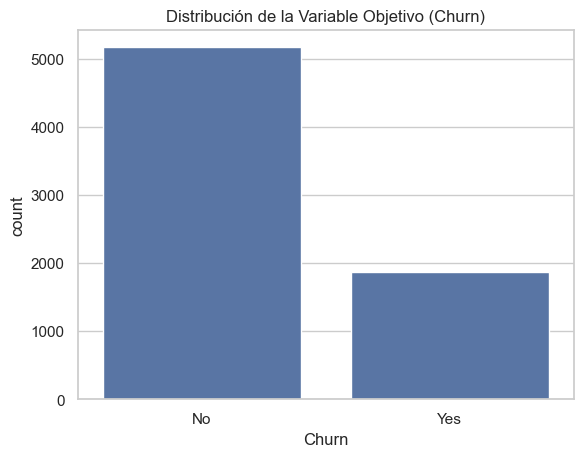

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [6]:
# ¿Qué queremos predecir?
sns.countplot(x='Churn', data=df)
plt.title('Distribución de la Variable Objetivo (Churn)')
plt.show()

print(df['Churn'].value_counts(normalize=True))

##  Plan de Preprocesamiento (Semana 14)

Basado en este EDA, nuestro pipeline deberá hacer lo siguiente:

1.  **Imputar Faltantes:** Rellenar los 11 `NaN` de `TotalCharges` (probablemente con 0 o la media).
2.  **Codificar Categóricas:** Convertir todas las columnas `object` (como `gender`, `Contract`, `PaymentMethod`) en números usando **OneHotEncoder**.
3.  **Escalar Numéricas:** Estandarizar las columnas numéricas (`tenure`, `MonthlyCharges`, `TotalCharges`) usando **StandardScaler**.
4.  **Codificar Objetivo:** Convertir `Churn` ('Yes'/'No') a (1/0).